<a href="https://colab.research.google.com/github/epadam/Machine-Learning-Tutorial-Demo-Resources/blob/master/notebooks/data_analysis/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install --upgrade witwidget
!pip install pdpbox

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
import pandas as pd 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import functools
import seaborn as sns

In [3]:
boston = load_boston()

# Load dataset into dataframe but change column names to more meaningful business names
df = pd.DataFrame(boston['data'], columns=['Crime Rate', 'Residential Land Zones', 'Non-retail Business Acres',
                                          'Charles River tract bounds', 'N.O. Concentration', '# of Rooms', 'Age',
                                          'Distance to Employment', 'Highway Accessibility', 'Property Tax Rate',
                                          'Pupil Teacher Ratio', 'B', '% Lower Income'])

# drop the "B" variable as it adds racial bias which has no place in our models
df.drop("B", axis=1, inplace=True)

# Dividing up features (X) and target variables (y)
X = df
y= pd.DataFrame(boston['target'], columns=['Median Home Value'])
dfy = pd.concat([df, y], axis=1)
dfy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,Crime Rate,Residential Land Zones,Non-retail Business Acres,Charles River tract bounds,N.O. Concentration,# of Rooms,Age,Distance to Employment,Highway Accessibility,Property Tax Rate,Pupil Teacher Ratio,% Lower Income,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [18]:
dfy

,Crime Rate,Residential Land Zones,Non-retail Business Acres,Charles River tract bounds,N.O. Concentration,# of Rooms,Age,Distance to Employment,Highway Accessibility,Property Tax Rate,Pupil Teacher Ratio,% Lower Income,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Data Cleansing

Data Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

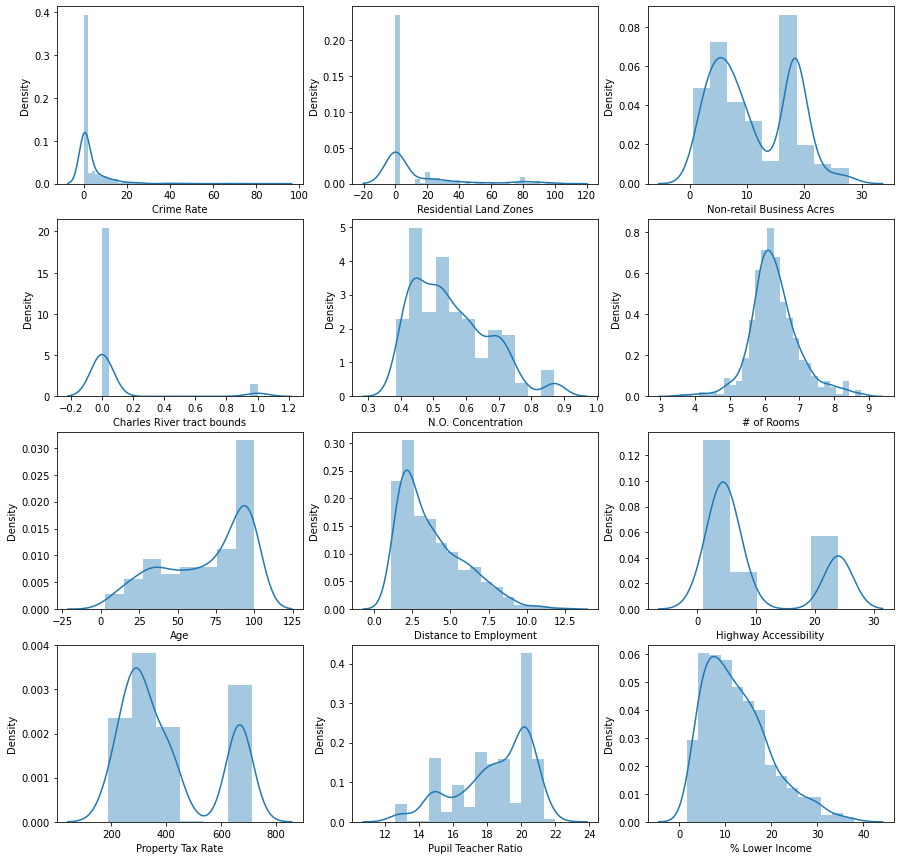

In [3]:
#g = sns.FacetGrid(df)
#g.map(sns.displot, "Age", kde=True)
#sns.displot(data=df, x="Age", hue="% Lower Income", kind="kde")

# for i, column in enumerate(df.columns, 1):
#     plt.subplot(3,3,i)
#     sns.displot(df[column])
n_rows=4
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15))
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])

Data scatter plot, scatter plot with another feature as color

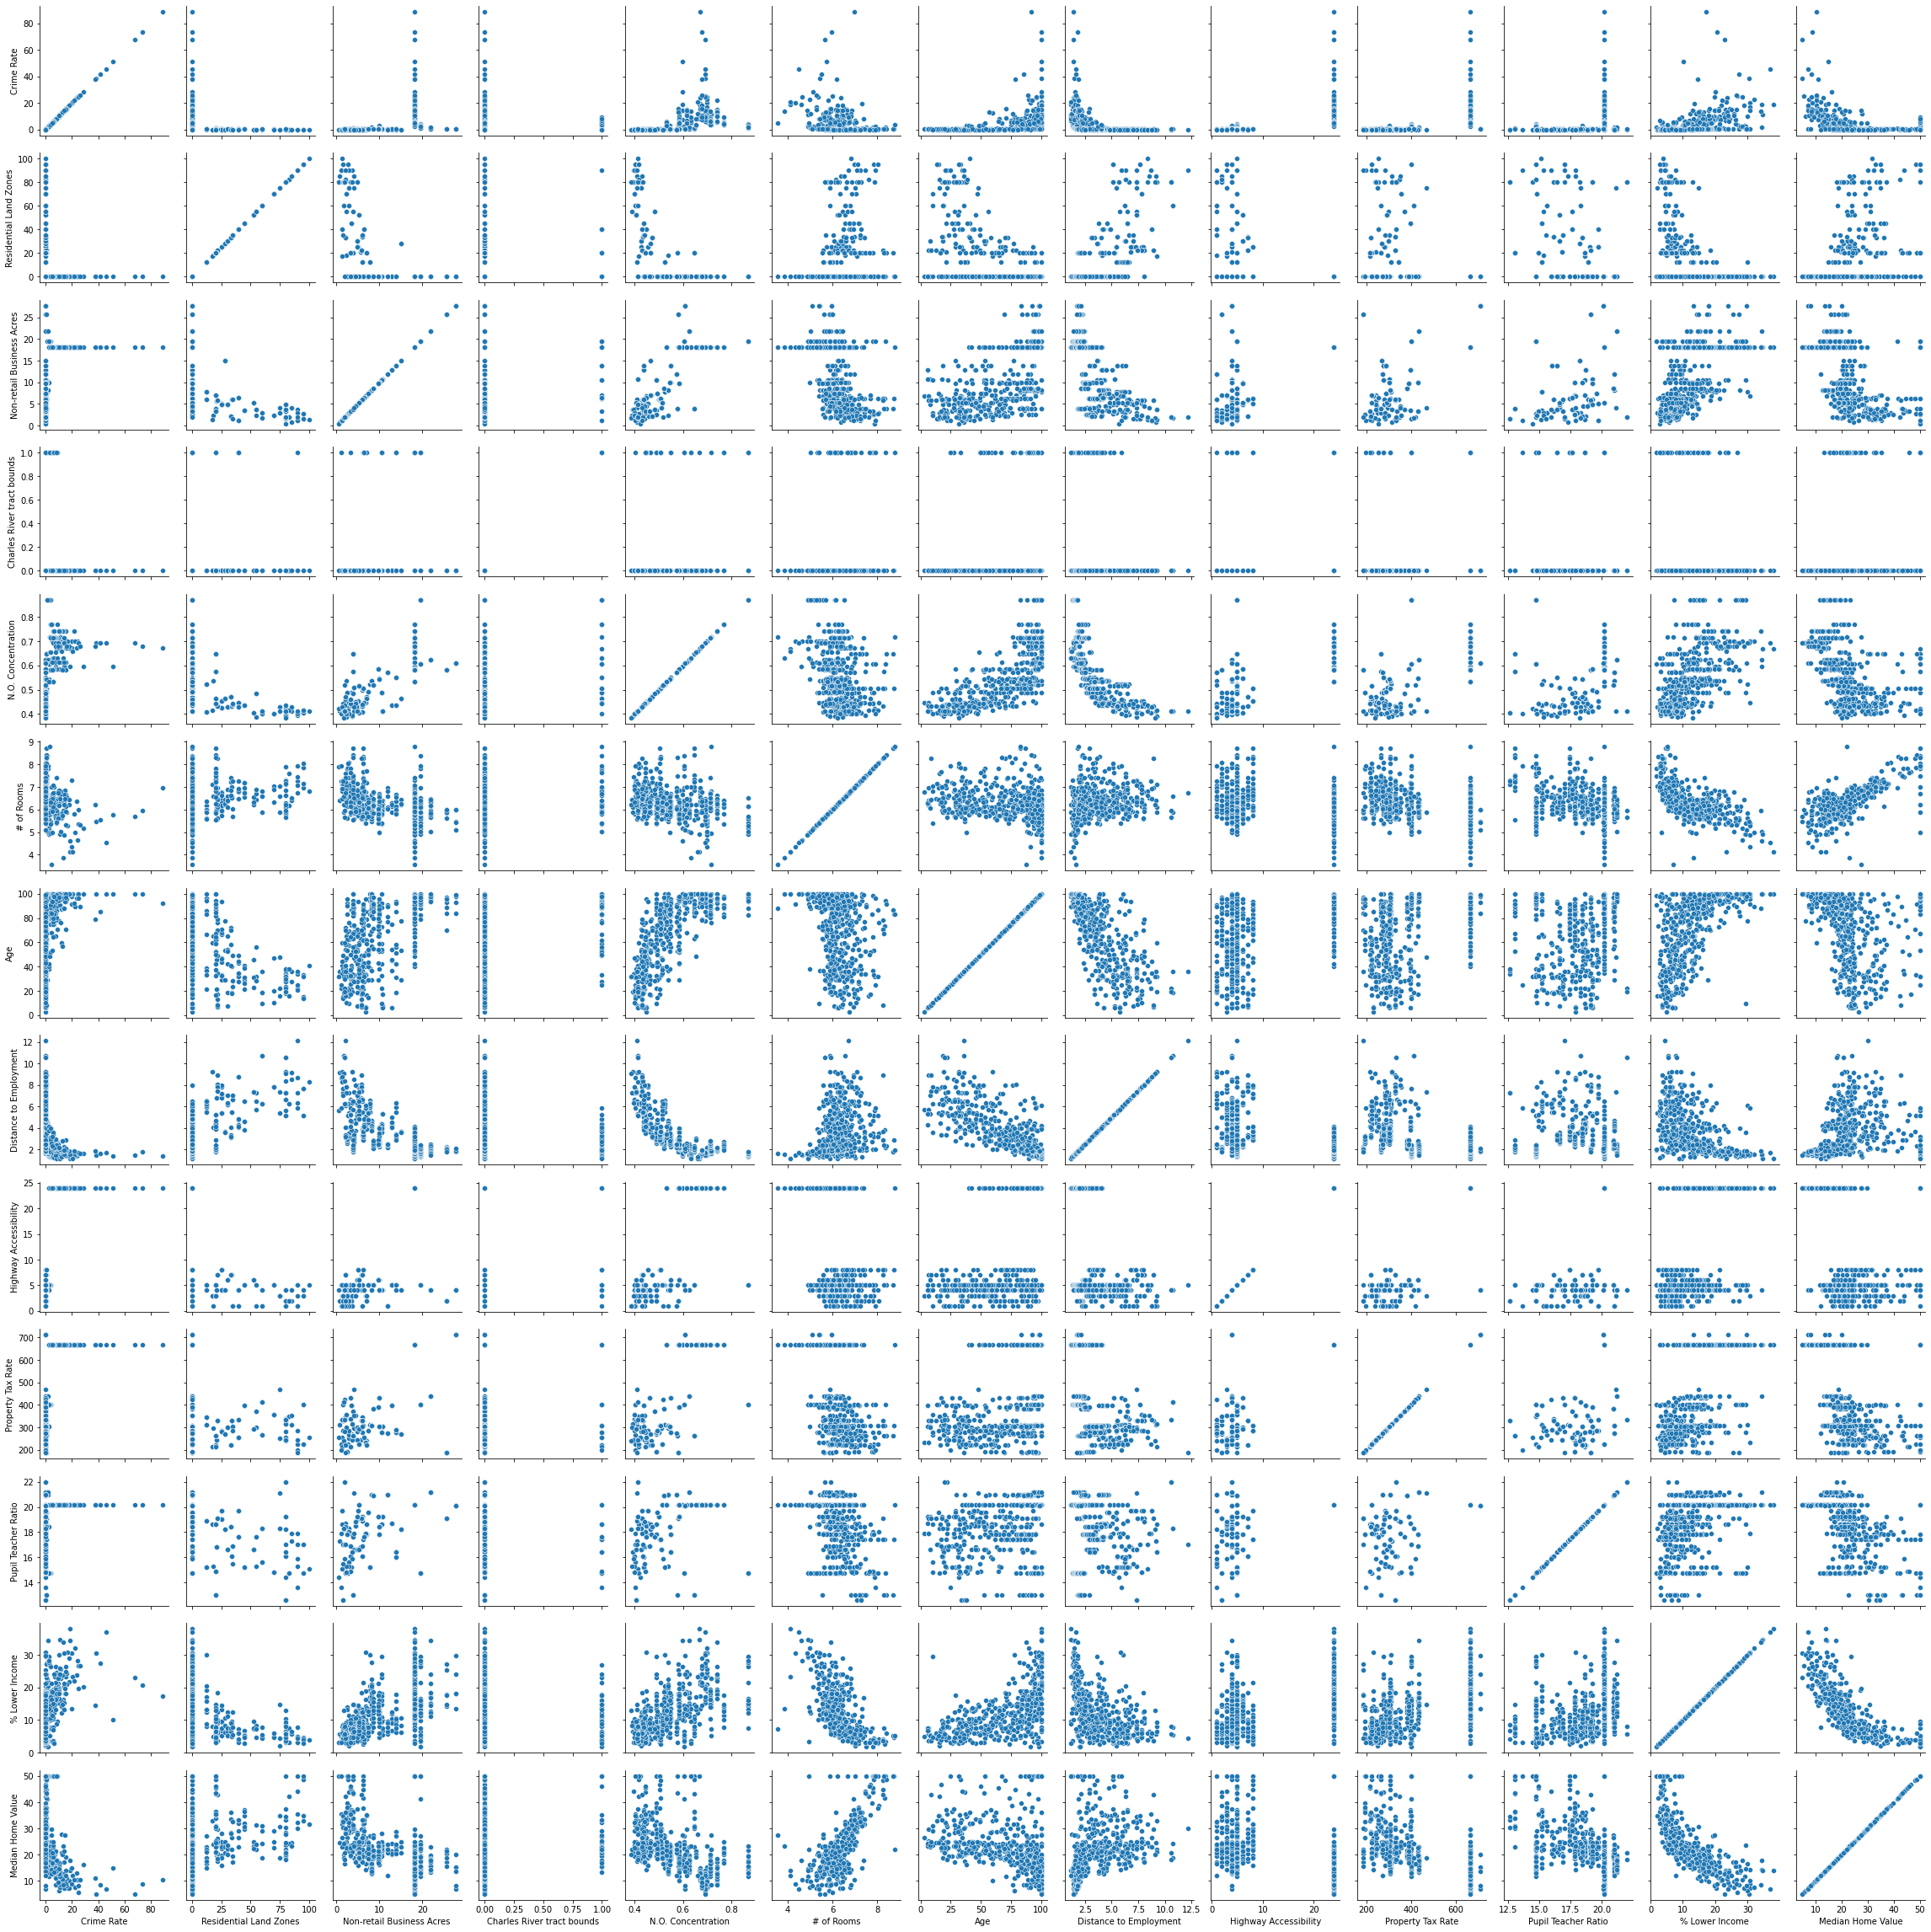

In [19]:
g = sns.PairGrid(dfy)
g.map(sns.scatterplot)

In [9]:
# Creating training and testing dataset. I am removing one quarter from the training dataset (0.25) for validation testing.
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential()

# Add in our input and hidden layers
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

# Add our output layer
model.add(Dense(1))

# Adding early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

# Compile model
model.compile(loss='mse', optimizer='adam')

In [11]:
model.fit(X_train, y_train, epochs=500, callbacks=[early_stop], validation_data=[X_test, y_test], verbose=0)

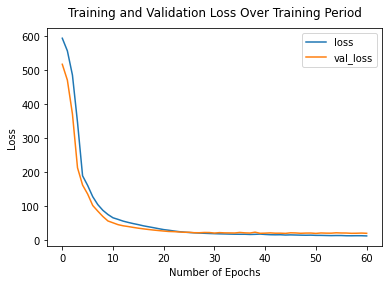

In [8]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

PDP plot, permutation feature importance, shap value

In [15]:
# permutation feature importance

array([[8.31469032e-02, 0.00000000e+00, 6.46627566e-01, ...,
        9.14122137e-01, 8.08510638e-01, 6.80739514e-01],
       [6.75509510e-04, 0.00000000e+00, 1.31598240e-01, ...,
        2.08015267e-01, 4.25531915e-01, 1.43211921e-01],
       [5.63336716e-04, 4.21052632e-01, 2.18108504e-01, ...,
        1.27862595e-01, 5.31914894e-01, 4.96688742e-02],
       ...,
       [6.98067706e-03, 0.00000000e+00, 2.81524927e-01, ...,
        2.29007634e-01, 8.93617021e-01, 1.85982340e-01],
       [1.06859872e-01, 0.00000000e+00, 6.46627566e-01, ...,
        9.14122137e-01, 8.08510638e-01, 4.68543046e-01],
       [1.46889936e-01, 0.00000000e+00, 6.46627566e-01, ...,
        9.14122137e-01, 8.08510638e-01, 3.59547461e-01]])

In [ ]:
disp=plot_partial_dependence(model, X_holdout,target=1, verbose =1, features=[0,1,2,3,4,5], feature_names=['Crime Rate', 'Residential Land Zones', 'Non-retail Business Acres',
                                          'Charles River tract bounds', 'N.O. Concentration', '# of Rooms', 'Age',
                                          'Distance to Employment', 'Highway Accessibility', 'Property Tax Rate',
                                          'Pupil Teacher Ratio', '% Lower Income'])

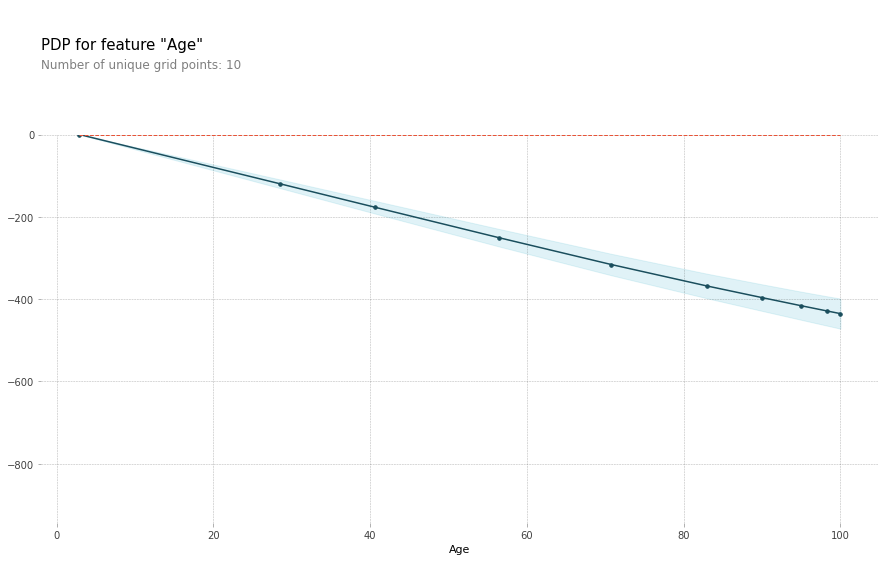

In [17]:
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
feature_names=['Crime Rate', 'Residential Land Zones', 'Non-retail Business Acres',
                                          'Charles River tract bounds', 'N.O. Concentration', '# of Rooms', 'Age',
                                          'Distance to Employment', 'Highway Accessibility', 'Property Tax Rate',
                                          'Pupil Teacher Ratio', '% Lower Income']
pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=feature_names, feature='Age')

# plot it
pdp.pdp_plot(pdp_goals, 'Age')
plt.show()

In [ ]:
import xgboost
import shap

# train an XGBoost model
#X, y = shap.datasets.boston()
#model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

Evaluation with Segment, like Manifold, Microsoft Responsible AI

What if tool for visualization of data distribution, pdp plot, counterfactual instance, Data visualization, scatter plot(corelation of target also prediction)

In [ ]:
# Creates a tf feature spec from the dataframe and columns specified.
def create_feature_spec(df, columns=None):
    feature_spec = {}
    if columns == None:
        columns = df.columns.values.tolist()
    for f in columns:
        if df[f].dtype is np.dtype(np.int64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.int64)
        elif df[f].dtype is np.dtype(np.float64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.float32)
        else:
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.string)
    return feature_spec

# Creates simple numeric and categorical feature columns from a feature spec and a
# list of columns from that spec to use.
#
# NOTE: Models might perform better with some feature engineering such as bucketed
# numeric columns and hash-bucket/embedding columns for categorical features.
def create_feature_columns(columns, feature_spec):
    ret = []
    for col in columns:
        if feature_spec[col].dtype is tf.int64 or feature_spec[col].dtype is tf.float32:
            ret.append(tf.feature_column.numeric_column(col))
        else:
            ret.append(tf.feature_column.indicator_column(
                tf.feature_column.categorical_column_with_vocabulary_list(col, list(df[col].unique()))))
    return ret

# An input function for providing input to a model from tf.Examples
def tfexamples_input_fn(examples, feature_spec, label, mode=tf.estimator.ModeKeys.EVAL,
                       num_epochs=None, 
                       batch_size=64):
    def ex_generator():
        for i in range(len(examples)):
            yield examples[i].SerializeToString()
    dataset = tf.data.Dataset.from_generator(
      ex_generator, tf.dtypes.string, tf.TensorShape([]))
    if mode == tf.estimator.ModeKeys.TRAIN:
        dataset = dataset.shuffle(buffer_size=2 * batch_size + 1)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(lambda tf_example: parse_tf_example(tf_example, label, feature_spec))
    dataset = dataset.repeat(num_epochs)
    return dataset

# Parses Tf.Example protos into features for the input function.
def parse_tf_example(example_proto, label, feature_spec):
    parsed_features = tf.io.parse_example(serialized=example_proto, features=feature_spec)
    target = parsed_features.pop(label)
    return parsed_features, target

# Converts a dataframe into a list of tf.Example protos.
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples

# Converts a dataframe column into a column of 0's and 1's based on the provided test.
# Used to force label columns to be numeric for binary classification using a TF estimator.
def make_label_column_numeric(df, label_column, test):
  df[label_column] = np.where(test(df[label_column]), 1, 0)

In [ ]:
# Set the column in the dataset you wish for the model to predict
label_column = 'Over-50K'

# Make the label column numeric (0 and 1), for use in our model.
# In this case, examples with a target value of '>50K' are considered to be in
# the '1' (positive) class and all other examples are considered to be in the
# '0' (negative) class.
make_label_column_numeric(df, label_column, lambda val: val == '>50K')

# Set list of all columns from the dataset we will use for model input.
input_features = [
  'Age', 'Workclass', 'Education', 'Marital-Status', 'Occupation',
  'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss',
  'Hours-per-week', 'Country']

# Create a list containing all input features and the label column
features_and_labels = input_features + [label_column]

In [ ]:
examples = df_to_examples(df)

In [ ]:
num_steps = 2000 

# Create a feature spec for the classifier
feature_spec = create_feature_spec(df, features_and_labels)

# Define and train the classifier
train_inpf = functools.partial(tfexamples_input_fn, examples, feature_spec, label_column)
classifier = tf.estimator.LinearClassifier(
    feature_columns=create_feature_columns(input_features, feature_spec))
classifier.train(train_inpf, steps=num_steps)

In [ ]:
num_steps_2 = 2000 

classifier2 = tf.estimator.DNNClassifier(
    feature_columns=create_feature_columns(input_features, feature_spec),
    hidden_units=[128, 64, 32])
classifier2.train(train_inpf, steps=num_steps_2)

In [ ]:
num_datapoints = 2000 
tool_height_in_px = 1000  

from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget

# Load up the test dataset
test_csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
test_df = pd.read_csv(test_csv_path, names=csv_columns, skipinitialspace=True,
  skiprows=1)
make_label_column_numeric(test_df, label_column, lambda val: val == '>50K.')
test_examples = df_to_examples(test_df[0:num_datapoints])

# Setup the tool with the test examples and the trained classifier
config_builder = WitConfigBuilder(test_examples[0:num_datapoints]).set_estimator_and_feature_spec(
    classifier, feature_spec).set_compare_estimator_and_feature_spec(
    classifier2, feature_spec).set_label_vocab(['Under 50K', 'Over 50K'])
a = WitWidget(config_builder, height=tool_height_in_px)